In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import random
import pydot
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("hw_2_stops.csv").dropna()

In [ ]:
data.dtypes

In [3]:
for elem in ['day','month','location.housing','suspect.sex','suspect.build','suspect.race','suspected.crime']:
    

    unique_list = list(set(data[elem]))
    days_dict = dict(zip(unique_list,range(len(unique_list))))
    data[elem] = map(lambda x:days_dict[x],data[elem])

In [4]:
X = data.drop(['found.weapon','arrested','date'],1)
y = data['arrested']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [6]:
clf = RandomForestClassifier(random_state=0,min_samples_split=100,max_features=6,n_estimators=10 )#,min_samples_split=i,max_features=6)
fitted_model = clf.fit(X_train,y_train)
result = clf.predict(X_test)
print sum(result==y_test)*100.0/len(y_test)
print(roc_auc_score(result, y_test))

96.7058930438
0.912987157722


In [7]:
roc_auc_score(result, y_test)

0.91298715772169048

96.8208809683
96.8320652041
96.8299681599
96.8128422988
96.834861263


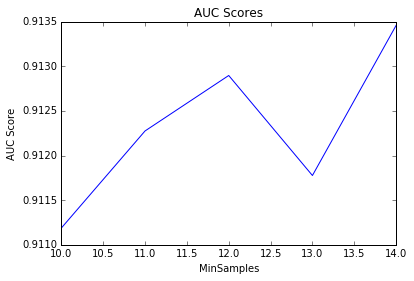

In [16]:
scores = []
for i in range(10,15):
    
    clf = RandomForestClassifier(random_state=0,min_samples_split=i,max_features=6,n_estimators=10,n_jobs=-1 )
    fitted_model = clf.fit(X_train,y_train)
    result = clf.predict(X_test)
    print sum(result==y_test)*100.0/len(y_test)
    scores.append(roc_auc_score(result, y_test))

plt.plot(range(10,15),scores)
plt.xlabel("MinSamples")
plt.ylabel("AUC Score")
plt.title("AUC Scores")

In [14]:
scores

[0.9111875314798642]

In [17]:
prob = clf.predict_proba(X_test)
XTEST = X_test.join(y_test)
XTEST['Prob'] = prob[:,1:2]
XTEST['pred'] = result

[ 10 122  47 115  71  66  25  76  79 110 103  61  34  73  60  63  23 107
  26   6  14  49  43  62 105  81 101  19  88   1   7  17  44  40  13 102
  69  32  75 111  94 112  46  20  24 113  42  52  41  90  33 120 114  67
  83 104 108 100  70  72  28  48  18  50  77 109  68  30   5  78 106  84
   9  45  22 123]
[3 1 5 2 0 4]


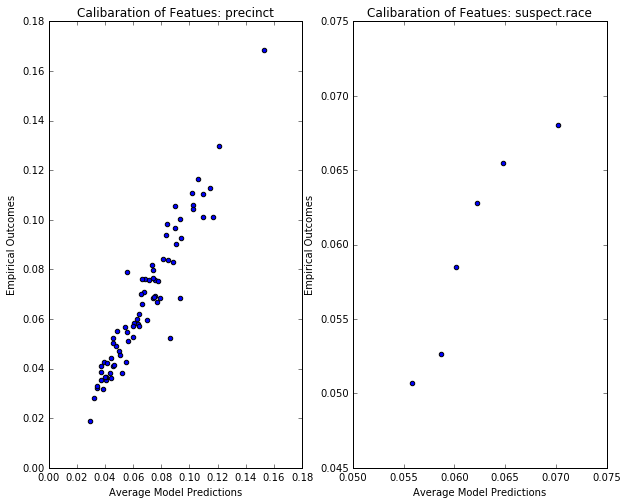

In [18]:
plt.figure(figsize=(10, 8), dpi=200)
p = 1

for cols in ['precinct','suspect.race']:
    x=[]
    y=[]
    uniques = XTEST[cols].unique()
    #print uniques
    for i in uniques:
        y.append(sum(XTEST[XTEST[cols]==i].arrested)*1.0/len(XTEST[XTEST[cols]==i]))
        x.append(sum(XTEST[XTEST[cols]==i].Prob)*1.0/len(XTEST[XTEST[cols]==i]))
    plt.subplot(1, 2, p)
    p += 1
    plt.scatter(x,y)
    plt.xlabel("Average Model Predictions")
    plt.ylabel("Empirical Outcomes")
    plt.title("Calibaration of Featues: "+cols)


The first step was to randomly split the data into training and testing data (The conventional rule is 60,20,20 for train, validation, test) but validation is not used here so the split is 75:25. The test variable is arrested, but dates, is removed, as it didn't seem that important. Also the optional subsetting was not performed as the variable is arrested and subsetting did not seem like the best option as there are many predicates anyway. The min_sample was used to control the tree and not leaf nodes, also maximum features for splitting was taken to be 6, and not much experimented with- less than the almost square root of the total number of features.The AUC score increases as the samples in the each split are increased from 10-20, meaning that overfitting was happening before.
